## Please comment and upvote if you like this work!

## Take a look at the other notebooks in my profile:
## [CV notebooks](https://www.kaggle.com/killa92/code)

In [1]:
#!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.115 🚀 Python-3.10.17 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3090, 24113MiB)
Setup complete ✅ (24 CPUs, 62.6 GB RAM, 128.8/915.3 GB disk)


### Datasets and DataLoaders

In [2]:
from ultralytics import YOLO
from glob import glob
from tqdm import tqdm
import os, io, yaml

def make_ds(root, path_to_copy):
    
    with open(f"{root}/dataset.yaml", "r") as stream: data = yaml.safe_load(stream)
    labels = {idx: element.split("\n")[0] for idx, element in enumerate(open(f"{root}/labels.txt").readlines())}
    
    for key, value in data.items():
        if key == "train": data[key] = "train/images"
        elif key == "val": data[key] = "val/images"
        elif key == "test": data[key] = "test/images"
        elif key == "names": data[key] = labels
            
    files = glob(f"{root}/*")
    im_files = glob(f"{[file for file in files if 'images' in file][0]}/*")
    gt_files = glob(f"{[file for file in files if ('labels' in file) and os.path.isdir(file)][0]}/*")
    
    for idx, (ims, gts) in enumerate(zip(im_files, gt_files)):
        im_dir_name = f"{path_to_copy}/{os.path.basename(ims)}/images"; os.makedirs(im_dir_name, exist_ok = True)
        gt_dir_name = f"{path_to_copy}/{os.path.basename(gts)}/labels"; os.makedirs(gt_dir_name, exist_ok = True)
        im_files = glob(f"{ims}/*"); gt_files = glob(f"{gts}/*")
        for im_file, gt_file in tqdm(zip(im_files, gt_files)):
            os.system(f"cp {im_file} {im_dir_name}"); os.system(f"cp {gt_file} {gt_dir_name}")
    with io.open(f'{path_to_copy}/data.yaml', 'w', encoding='utf8') as outfile: yaml.dump(data, outfile, default_flow_style=False, allow_unicode=True)       
root = "data"
make_ds(root = root, path_to_copy = "working/data")

3191it [00:10, 312.01it/s]
373it [00:01, 313.45it/s]
1000it [00:03, 315.27it/s]


### AI Model Train and Validation

In [3]:
!yolo task=detect mode=train model=yolov8s.pt data="working/data/data.yaml" epochs=10 imgsz=640 plots=True

Ultralytics 8.3.115 🚀 Python-3.10.17 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3090, 24113MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=working/data/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

### Learning Curves

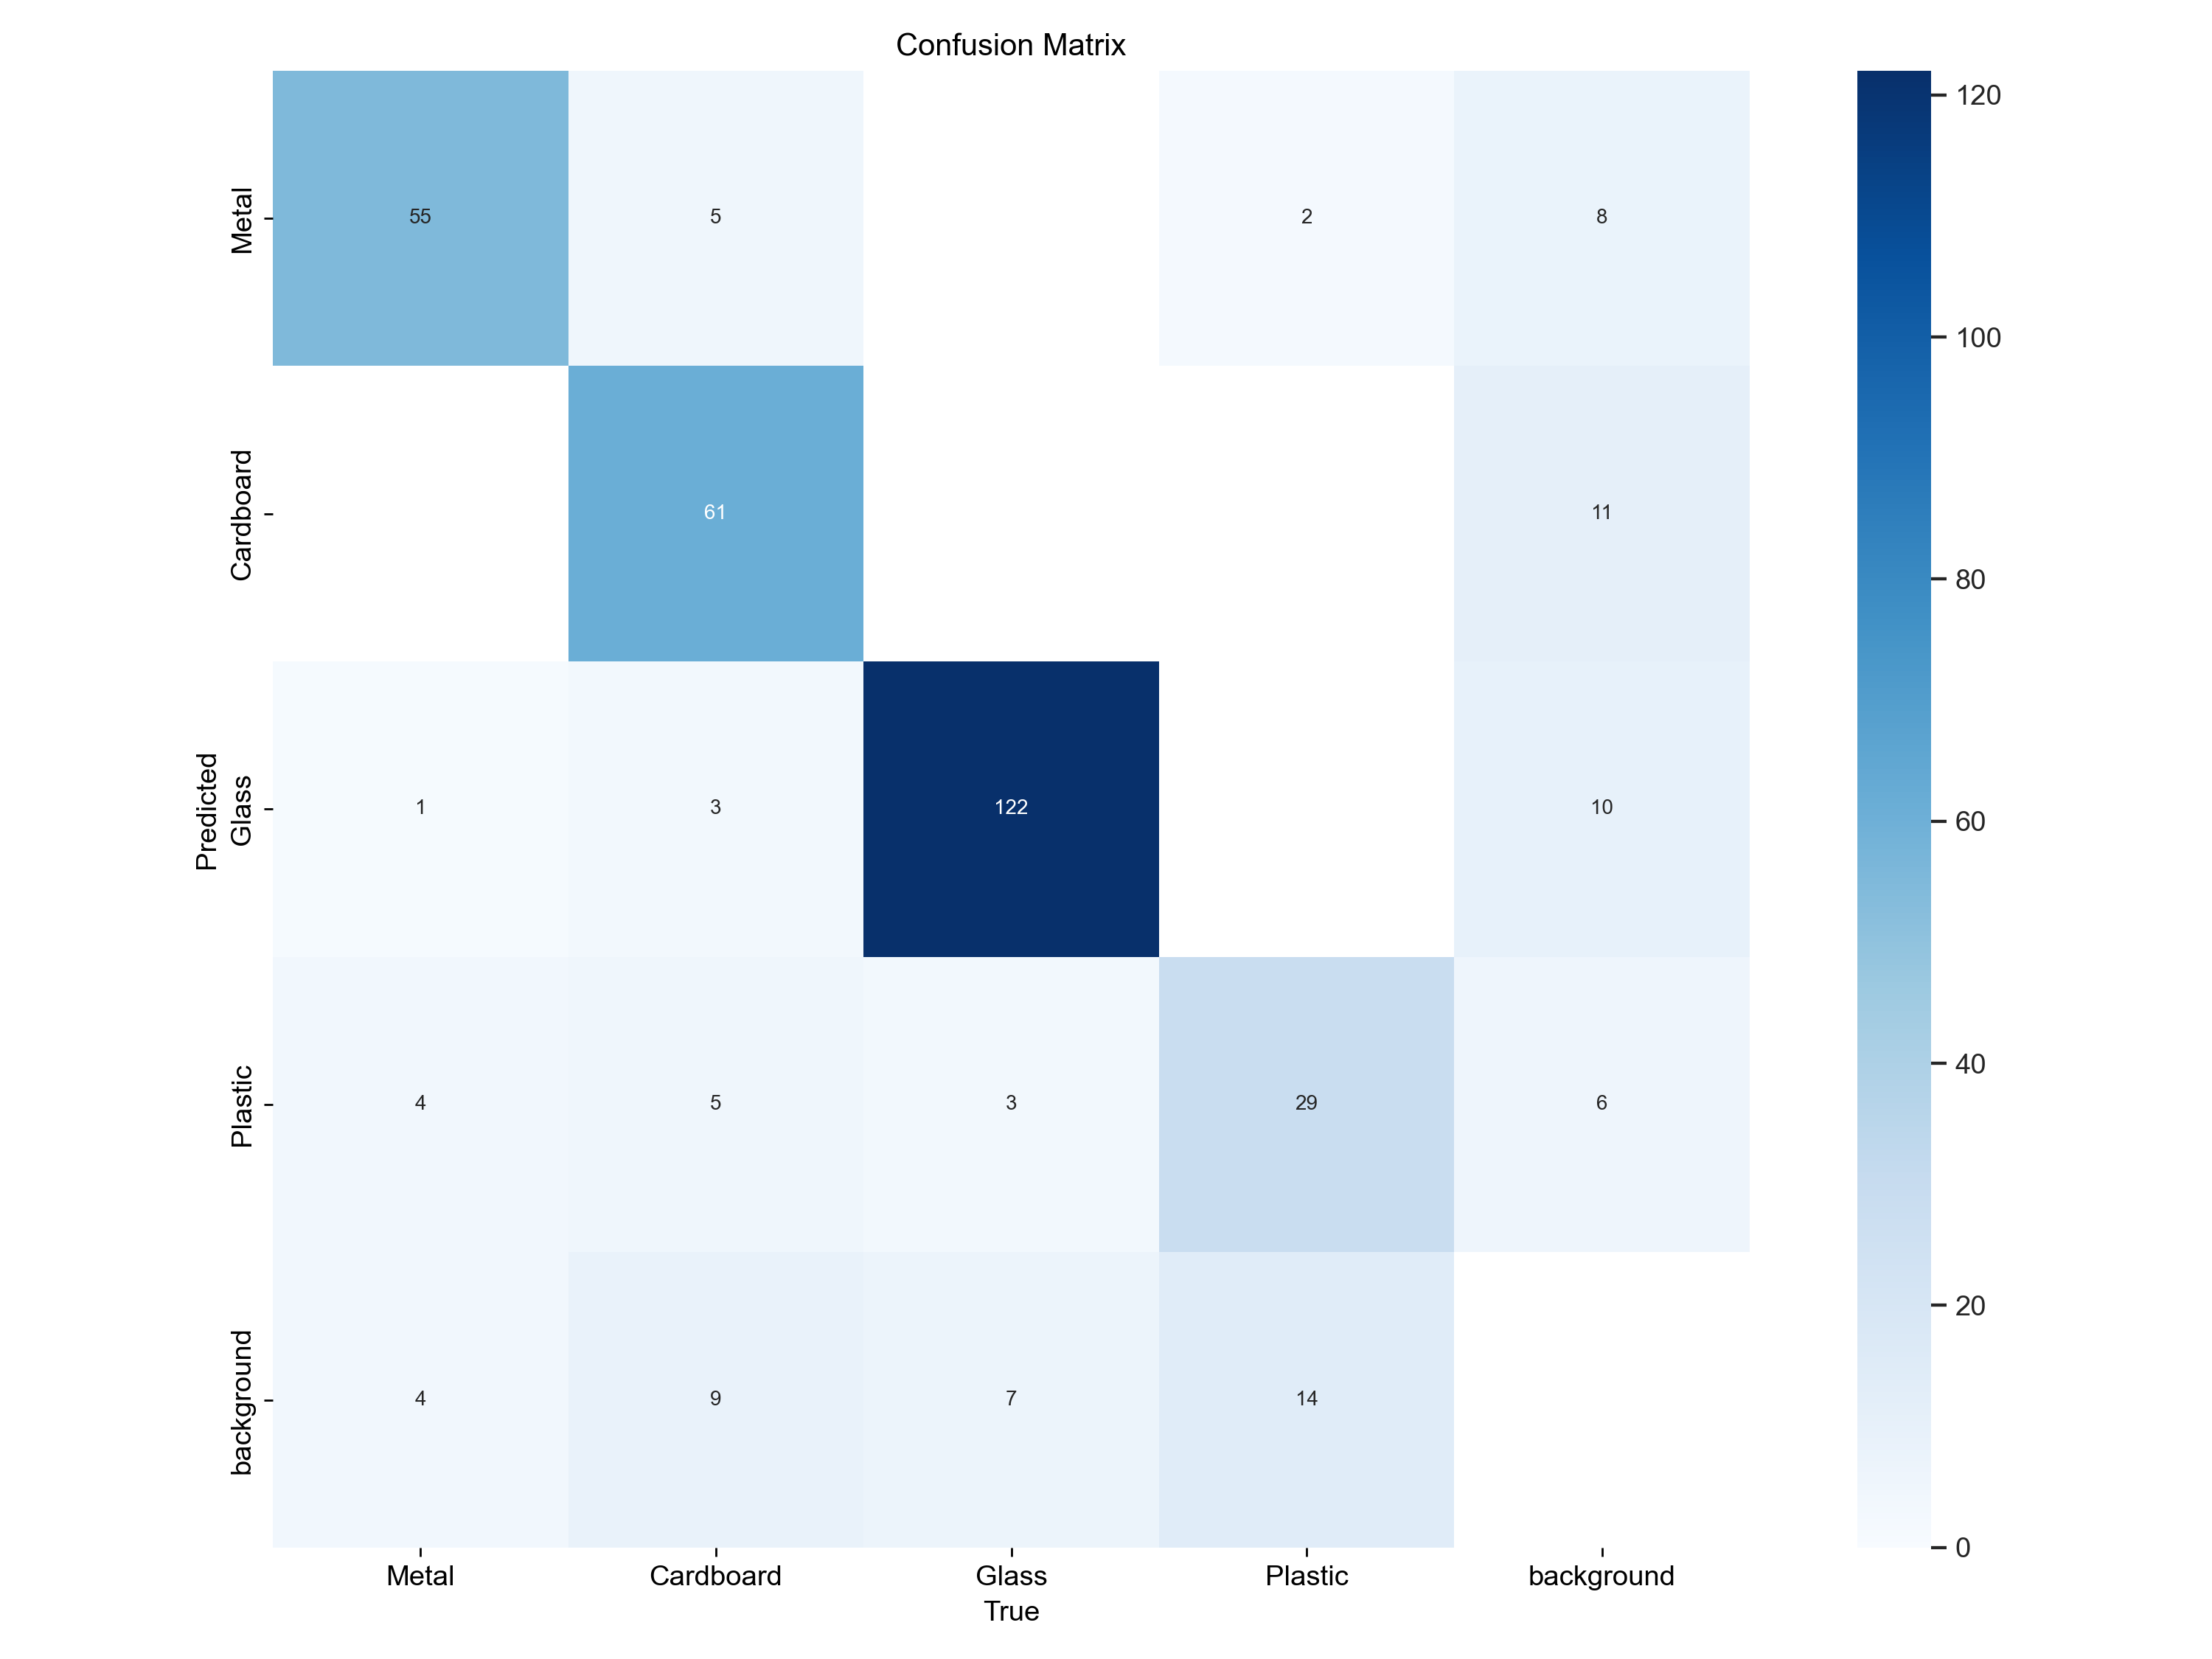

In [4]:
from PIL import Image
Image.open("runs/detect/train/confusion_matrix.png")

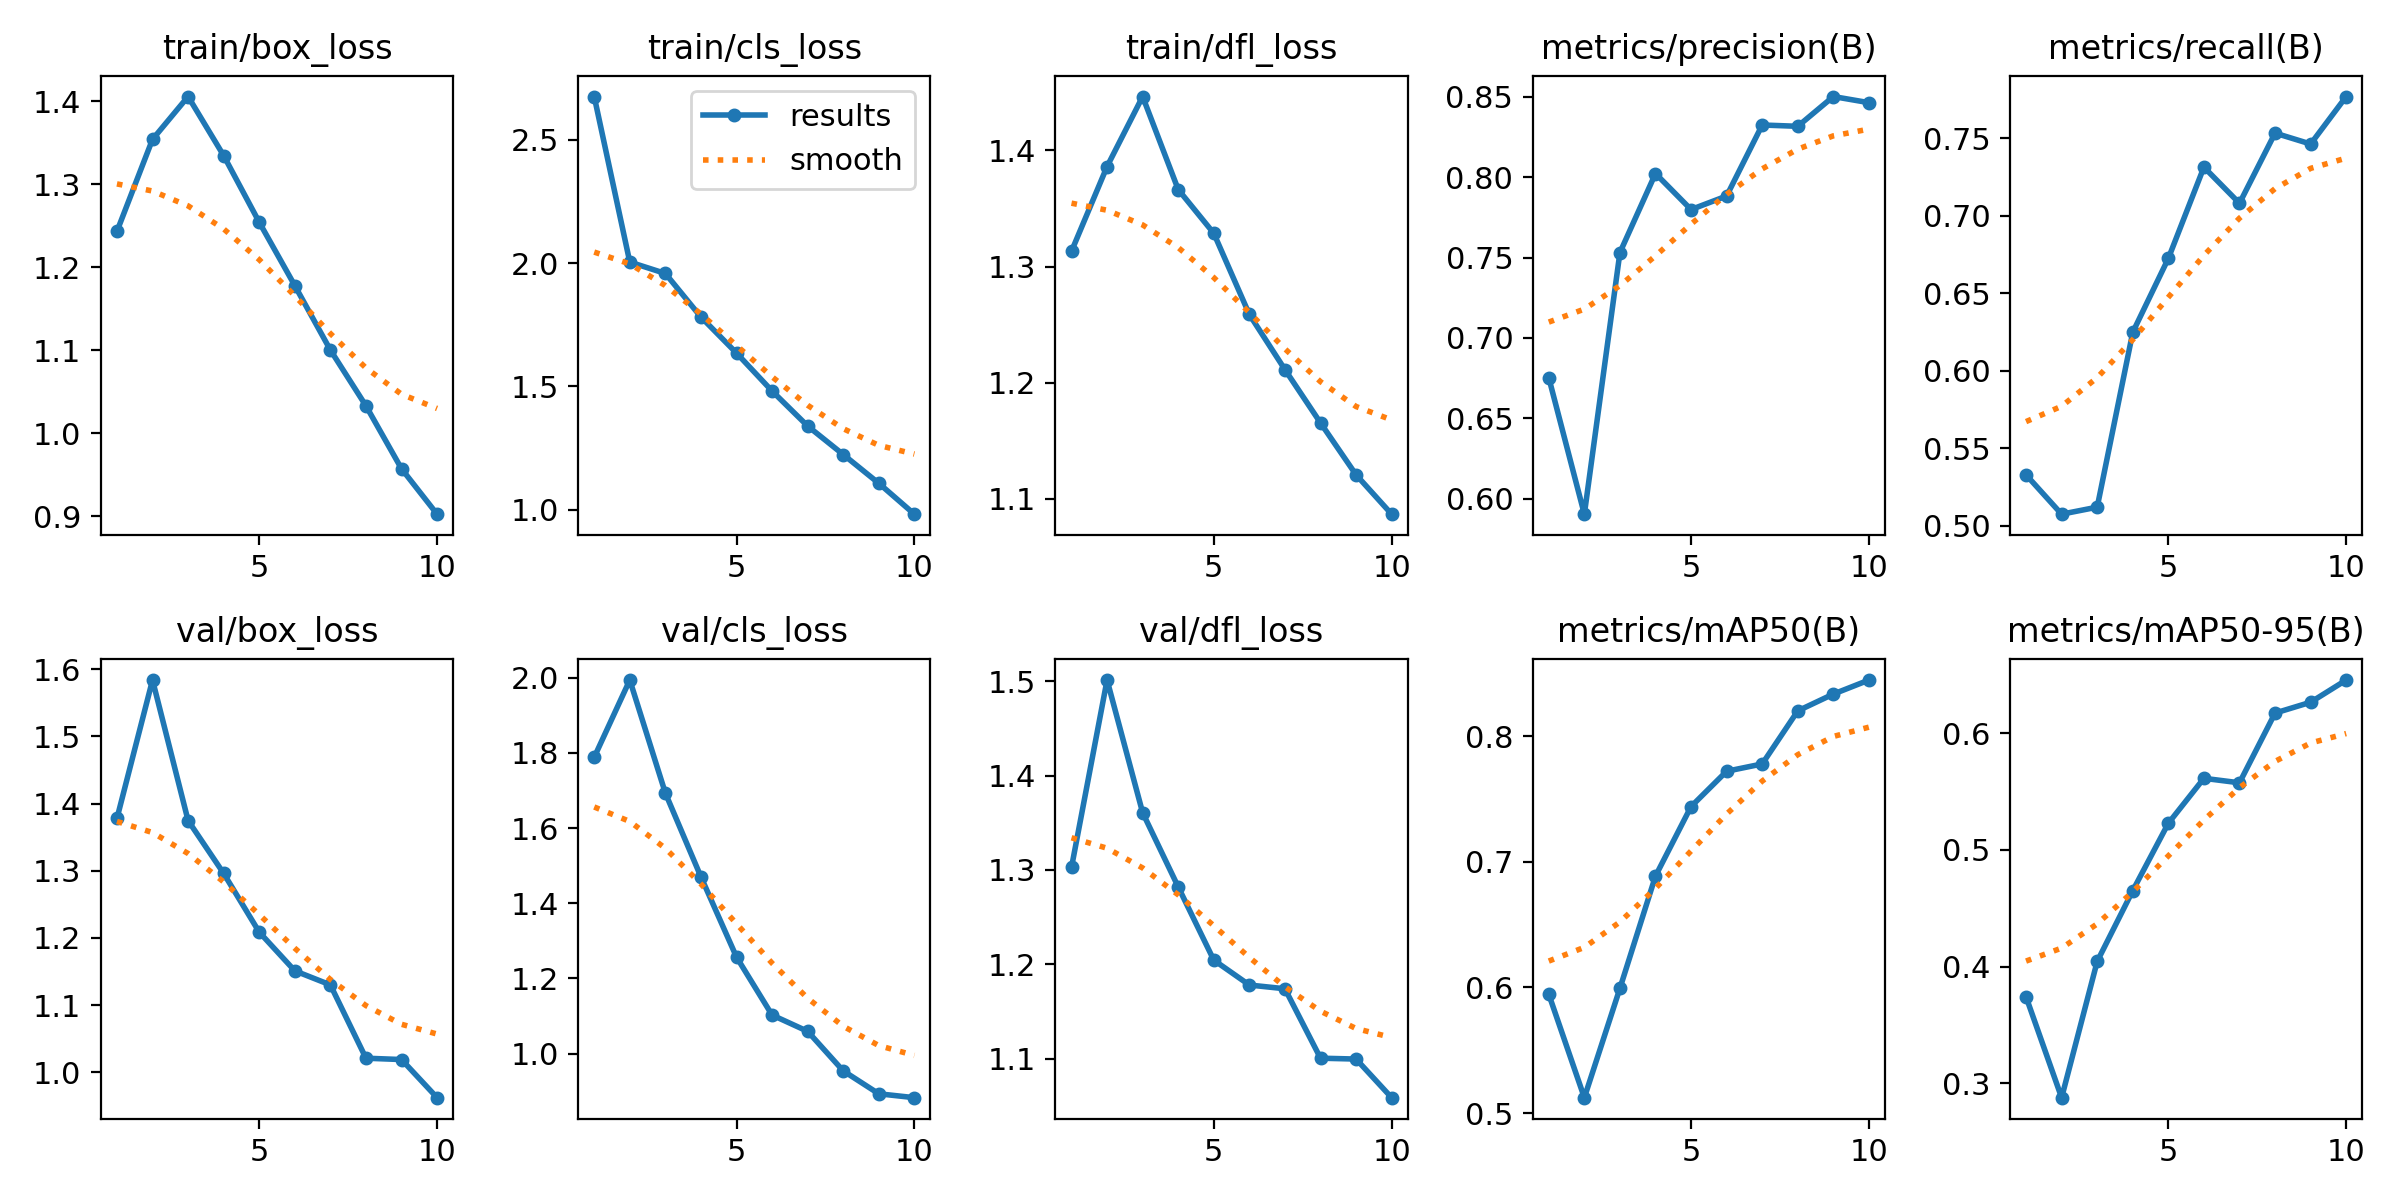

In [5]:
Image.open("runs/detect/train/results.png")

### Validation Process

In [6]:
!yolo task=detect mode=val model="runs/detect/train/weights/best.pt" data="working/data/data.yaml"

Ultralytics 8.3.115 🚀 Python-3.10.17 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3090, 24113MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2919.5±859.7 MB/s, size: 36.5 KB)
val: Scanning /home/frl/trash_detection/working/data/val/labels.cache... 123 ima
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        123        324      0.846      0.777      0.845      0.647
                 Metal         61         64      0.871      0.875      0.921      0.808
             Cardboard         67         83      0.889      0.723      0.871       0.61
                 Glass         79        132      0.939      0.931      0.953      0.748
               Plastic         30         45      0.687      0.578      0.633      0.424
Speed: 1.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more a

### Inference

In [7]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf = 0.4 source = "working/data/test/images" save = True

Ultralytics 8.3.115 🚀 Python-3.10.17 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3090, 24113MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1000 /home/frl/trash_detection/working/data/test/images/000000_JPG.rf.11e1a2a219b571e5ff67b705e5ff5091.jpg: 640x640 (no detections), 3.9ms
image 2/1000 /home/frl/trash_detection/working/data/test/images/000000_JPG.rf.1655c46447929b533920120cd0762b97.jpg: 640x640 1 Plastic, 3.8ms
image 3/1000 /home/frl/trash_detection/working/data/test/images/000000_JPG.rf.29874ef752e5b210f1d45094feea4238.jpg: 640x640 1 Plastic, 3.4ms
image 4/1000 /home/frl/trash_detection/working/data/test/images/000000_JPG.rf.562ab059e98305e37753d7006d9ab30e.jpg: 640x640 (no detections), 3.3ms
image 5/1000 /home/frl/trash_detection/working/data/test/images/000000_JPG.rf.eeb424f81d3a87c3a4f1c0b84d4be8a3.jpg: 640x640 1 Plastic, 3.7ms
image 6/1000 /home/frl/trash_detection/working/data/test/images/000000_JPG.rf.fca84f56babd6d25e65a7020

### Inference Results Visualization

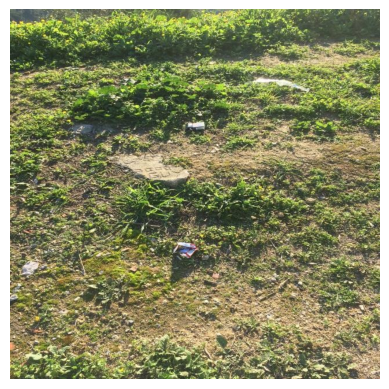

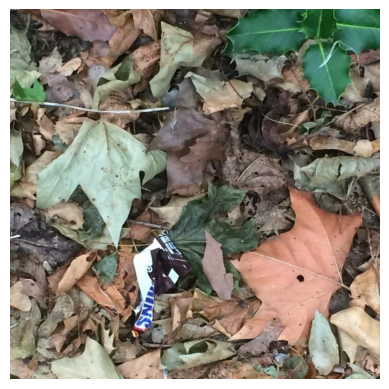

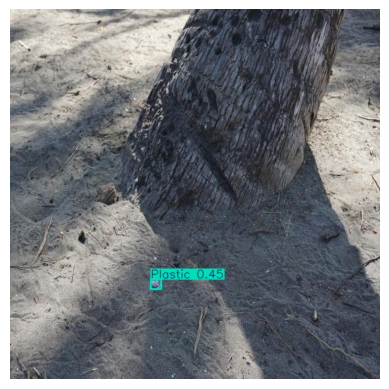

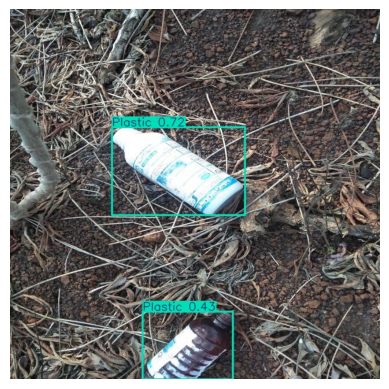

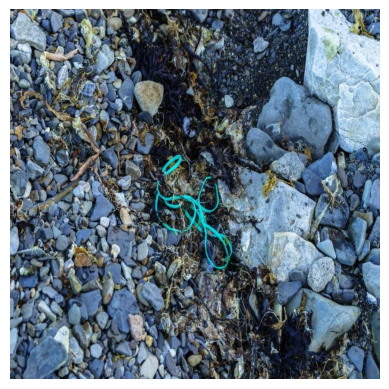

In [8]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt

for image_path in glob(f'runs/detect/predict/*.jpg')[:5]:
      plt.imshow(Image.open(image_path)); plt.axis("off"); plt.show()
      print("\n")